### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,f1_score,cohen_kappa_score,log_loss
import warnings
warnings.filterwarnings('ignore')

#### Load the csv file

In [2]:
df= pd.read_csv('Heart_disease.csv')

In [3]:
df.shape

(4240, 16)

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CVD                  0
dtype: int64

In [8]:
df =  df.dropna(subset=['education','BPMeds','totChol','cigsPerDay','BMI','heartRate'])

In [9]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [10]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CVD                0
dtype: int64

### Let's begin with some hands-on practice exercises

In [11]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
df_c = df[['male','education','currentSmoker','BPMeds','prevalentHyp','prevalentStroke','diabetes','CVD']]
df_n = df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_nss = ss.fit_transform(df_n)
df_nss = pd.DataFrame(df_nss,columns=df_n.columns,index=df_c.index)

In [14]:
df_c = pd.get_dummies(df_c,columns=['education'],drop_first=True)

In [15]:
df = pd.concat([df_nss,df_c],axis=1)

In [16]:
df.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,currentSmoker,BPMeds,prevalentHyp,prevalentStroke,diabetes,CVD,education_2.0,education_3.0,education_4.0
0,-1.227690,-0.757271,-0.945063,-1.195233,-1.082956,0.293357,0.341434,-0.197849,1,0,0.0,0,0,0,0,0,0,1
1,-0.407183,-0.757271,0.304497,-0.511595,-0.157047,0.724831,1.582684,-0.241494,0,0,0.0,0,0,0,0,1,0,0
2,-0.172752,0.921206,0.190901,-0.215351,-0.241221,-0.106247,-0.072315,-0.503360,1,1,0.0,0,0,0,0,0,0,0
3,1.351046,1.760444,-0.263484,0.810106,1.021382,0.688057,-0.899815,0.936904,0,1,0.0,1,0,0,1,0,1,0
4,-0.407183,1.172977,1.099672,-0.101412,0.095473,-0.655396,0.755184,0.151306,0,1,0.0,0,0,0,0,0,1,0


In [17]:
df.isnull().sum()

age                0
cigsPerDay         0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
male               0
currentSmoker      0
BPMeds             0
prevalentHyp       0
prevalentStroke    0
diabetes           0
CVD                0
education_2.0      0
education_3.0      0
education_4.0      0
dtype: int64

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
print('The percentage of classes in the dataset are:')
print(df['CVD'].value_counts()/len(df['CVD'])*100)
print('Since both the classes are having more than 10%, we can say the data has fair representation.')

The percentage of classes in the dataset are:
0    85.083981
1    14.916019
Name: CVD, dtype: float64
Since both the classes are having more than 10%, we can say the data has fair representation.


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
import statsmodels.api as sm

x=df[['diaBP','sysBP','BPMeds']]
y=df['CVD']
xc=sm.add_constant(x)

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3,random_state=0)

model = sm.Logit(ytrain,xtrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.403846
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2792
Model:                          Logit   Df Residuals:                     2788
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                 0.05321
Time:                        17:08:33   Log-Likelihood:                -1127.5
converged:                       True   LL-Null:                       -1190.9
Covariance Type:            nonrobust   LLR p-value:                 2.734e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8269      0.057    -31.937      0.000      -1.939      -1.715
diaBP         -0.1389      0.080     -1.741      0.082      -0.295       0.018
sysBP          0.6094      0.077      7.872      0.000       0.458       0.761
BPMeds         0.4158      0.256      1.623      0.105      -0.086       0.918
==============================================================================
"""

In [20]:
xtrain= xtrain.drop(columns=['BPMeds','diaBP'])
xtest = xtest.drop(columns=['BPMeds','diaBP'])

In [21]:
model = sm.Logit(ytrain,xtrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.404867
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2792
Model:                          Logit   Df Residuals:                     2790
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                 0.05082
Time:                        17:08:33   Log-Likelihood:                -1130.4
converged:                       True   LL-Null:                       -1190.9
Covariance Type:            nonrobust   LLR p-value:                 3.757e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8131      0.057    -32.034      0.000      -1.924      -1.702
sysBP          0.5301      0.048     10.975      0.000       0.435       0.625
==============================================================================
"""

### Conclusion:
From the model summary, LLR pvalue < 0.05 hence we can say model is good

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
df.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,currentSmoker,BPMeds,prevalentHyp,prevalentStroke,diabetes,CVD,education_2.0,education_3.0,education_4.0
0,-1.227690,-0.757271,-0.945063,-1.195233,-1.082956,0.293357,0.341434,-0.197849,1,0,0.0,0,0,0,0,0,0,1
1,-0.407183,-0.757271,0.304497,-0.511595,-0.157047,0.724831,1.582684,-0.241494,0,0,0.0,0,0,0,0,1,0,0
2,-0.172752,0.921206,0.190901,-0.215351,-0.241221,-0.106247,-0.072315,-0.503360,1,1,0.0,0,0,0,0,0,0,0
3,1.351046,1.760444,-0.263484,0.810106,1.021382,0.688057,-0.899815,0.936904,0,1,0.0,1,0,0,1,0,1,0
4,-0.407183,1.172977,1.099672,-0.101412,0.095473,-0.655396,0.755184,0.151306,0,1,0.0,0,0,0,0,0,1,0


In [23]:
x=df[['male','education_2.0','education_3.0','education_4.0','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']]
xc= sm.add_constant(x)
y=df['CVD']

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3,random_state=0)


model = sm.Logit(ytrain,xtrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.397243
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2792
Model:                          Logit   Df Residuals:                     2782
Method:                           MLE   Df Model:                            9
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                 0.06869
Time:                        17:08:33   Log-Likelihood:                -1109.1
converged:                       True   LL-Null:                       -1190.9
Covariance Type:            nonrobust   LLR p-value:                 1.323e-30
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1997      0.122    -18.095      0.000      -2.438      -1.961
male                0.4868      0.114      4.289      0.000       0.264       0.709
education_2.0      -0.5049      0.135     -3.752      0.000      -0.769      -0.241
education_3.0      -0.3953      0.165     -2.403      0.016      -0.718      -0.073
education_4.0      -0.4675      0.187     -2.506      0.012      -0.833      -0.102
currentSmoker       0.1666      0.113      1.474      0.140      -0.055       0.388
BPMeds              0.5840      0.253      2.311      0.021       0.089       1.079
prevalentStroke     1.0360      0.579      1.789      0.074      -0.099       2.171
prevalentHyp        0.8784      0.114      7.675      0.000       0.654       1.103
diabetes            1.3205      0.258      5.125      0.000       0.816       1.825
===================================================================================
"""

In [24]:
df_odds = pd.DataFrame(np.exp(model.params),columns=['Odds'])
df_odds

,Odds
const,0.110833
male,1.627153
education_2.0,0.603568
education_3.0,0.673487
education_4.0,0.626554
currentSmoker,1.181319
BPMeds,1.793161
prevalentStroke,2.817849
prevalentHyp,2.407040
diabetes,3.745364


Odds greater than 1 have impact on y.



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
y = df['CVD']
x = df['prevalentHyp']

xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3,random_state=0)


model = sm.Logit(ytrain,xtrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.411458
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2792
Model:                          Logit   Df Residuals:                     2790
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                 0.03536
Time:                        17:08:33   Log-Likelihood:                -1148.8
converged:                       True   LL-Null:                       -1190.9
Covariance Type:            nonrobust   LLR p-value:                 4.407e-20
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.0988      0.073    -28.774      0.000      -2.242      -1.956
prevalentHyp     0.9940      0.107      9.252      0.000       0.783       1.205
================================================================================
"""

In [26]:
print('Odds of having CVD given the person has history of hypertenson is:',np.exp(model.params['prevalentHyp']))
print('Odds of having CVD given the person has no history of hypertenson is:',1/np.exp(model.params['prevalentHyp']))
print('Odds ratio is: ',np.exp(model.params['prevalentHyp'])/(1/np.exp(model.params['prevalentHyp'])))

Odds of having CVD given the person has history of hypertenson is: 2.7019646970786337
Odds of having CVD given the person has no history of hypertenson is: 0.37010106056574343
Odds ratio is:  7.300613224259233


<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
y = df['CVD']
x = df.drop(columns='CVD')

xc = sm.add_constant(x)


xtrain_full,xtest_full,ytrain_full,ytest_full = train_test_split(xc,y,test_size=0.3,random_state=0)


model_full = sm.Logit(ytrain_full,xtrain_full).fit()
model_full.summary()

Optimization terminated successfully.
         Current function value: 0.372066
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2792
Model:                          Logit   Df Residuals:                     2774
Method:                           MLE   Df Model:                           17
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                  0.1277
Time:                        17:08:34   Log-Likelihood:                -1038.8
converged:                       True   LL-Null:                       -1190.9
Covariance Type:            nonrobust   LLR p-value:                 1.535e-54
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2310      0.155    -14.368      0.000      -2.535      -1.927
age                 0.5739      0.067      8.555      0.000       0.442       0.705
cigsPerDay          0.2252      0.087      2.580      0.010       0.054       0.396
totChol             0.0977      0.057      1.704      0.088      -0.015       0.210
sysBP               0.2672      0.096      2.790      0.005       0.079       0.455
diaBP              -0.0233      0.089     -0.260      0.795      -0.198       0.152
BMI                 0.0423      0.059      0.713      0.476      -0.074       0.159
heartRate           0.0080      0.058      0.137      0.891      -0.106       0.122
glucose             0.1840      0.067      2.748      0.006       0.053       0.315
male                0.5031      0.127      3.973      0.000       0.255       0.751
currentSmoker       0.0906      0.181      0.500      0.617      -0.264       0.446
BPMeds              0.3016      0.270      1.118      0.264      -0.227       0.830
prevalentHyp        0.1865      0.161      1.158      0.247      -0.129       0.502
prevalentStroke     1.0626      0.629      1.690      0.091      -0.170       2.295
diabetes            0.4057      0.377      1.077      0.282      -0.333       1.144
education_2.0      -0.2086      0.143     -1.459      0.144      -0.489       0.072
education_3.0      -0.1800      0.174     -1.036      0.300      -0.521       0.160
education_4.0      -0.1563      0.194     -0.805      0.421      -0.537       0.224
===================================================================================
"""

In [28]:
print("Mcfadden's R2 =",model.prsquared)

Mcfadden's R2 = 0.035363400374002096


In [29]:
ypred_prob_full = model_full.predict(xtest_full)
ypred_full = ypred = [0 if x<0.05 else 1 for x in ypred_prob_full]

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
y = df['CVD']
x = df.drop(columns='CVD')

xc = sm.add_constant(x)


xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3,random_state=0)


model = sm.Logit(ytrain,xtrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.372066
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2792
Model:                          Logit   Df Residuals:                     2774
Method:                           MLE   Df Model:                           17
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                  0.1277
Time:                        17:08:34   Log-Likelihood:                -1038.8
converged:                       True   LL-Null:                       -1190.9
Covariance Type:            nonrobust   LLR p-value:                 1.535e-54
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2310      0.155    -14.368      0.000      -2.535      -1.927
age                 0.5739      0.067      8.555      0.000       0.442       0.705
cigsPerDay          0.2252      0.087      2.580      0.010       0.054       0.396
totChol             0.0977      0.057      1.704      0.088      -0.015       0.210
sysBP               0.2672      0.096      2.790      0.005       0.079       0.455
diaBP              -0.0233      0.089     -0.260      0.795      -0.198       0.152
BMI                 0.0423      0.059      0.713      0.476      -0.074       0.159
heartRate           0.0080      0.058      0.137      0.891      -0.106       0.122
glucose             0.1840      0.067      2.748      0.006       0.053       0.315
male                0.5031      0.127      3.973      0.000       0.255       0.751
currentSmoker       0.0906      0.181      0.500      0.617      -0.264       0.446
BPMeds              0.3016      0.270      1.118      0.264      -0.227       0.830
prevalentHyp        0.1865      0.161      1.158      0.247      -0.129       0.502
prevalentStroke     1.0626      0.629      1.690      0.091      -0.170       2.295
diabetes            0.4057      0.377      1.077      0.282      -0.333       1.144
education_2.0      -0.2086      0.143     -1.459      0.144      -0.489       0.072
education_3.0      -0.1800      0.174     -1.036      0.300      -0.521       0.160
education_4.0      -0.1563      0.194     -0.805      0.421      -0.537       0.224
===================================================================================
"""

In [31]:
cols = list(xtrain.columns)

while len(cols)>0:
    X = xtrain[cols]
    M = sm.Logit(ytrain,X).fit()
    p = M.pvalues
    p = p.drop('const')
    pmax = max(p)
    feature = p.idxmax()
    if pmax >0.05:
        print('\nDrop ',feature,' with pvalue ',pmax,'\n')
        cols.remove(feature)
    else:
        break

Optimization terminated successfully.
         Current function value: 0.372066
         Iterations 7

Drop  heartRate  with pvalue  0.8910771172115118 

Optimization terminated successfully.
         Current function value: 0.372070
         Iterations 7

Drop  diaBP  with pvalue  0.7988364492275704 

Optimization terminated successfully.
         Current function value: 0.372081
         Iterations 7

Drop  currentSmoker  with pvalue  0.6129336362875781 

Optimization terminated successfully.
         Current function value: 0.372127
         Iterations 7

Drop  BMI  with pvalue  0.5337950416022901 

Optimization terminated successfully.
         Current function value: 0.372196
         Iterations 7

Drop  education_4.0  with pvalue  0.37473024131626664 

Optimization terminated successfully.
         Current function value: 0.372340
         Iterations 7

Drop  education_3.0  with pvalue  0.32534520788753096 

Optimization terminated successfully.
         Current function value: 0

In [32]:
print('The significant variables are \n',cols)

The significant variables are 
 ['const', 'age', 'cigsPerDay', 'sysBP', 'glucose', 'male']


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
y = df['CVD']
x = df.drop(columns='CVD')

xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3,random_state=0)

model = sm.Logit(ytrain,xtrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.372066
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2792
Model:                          Logit   Df Residuals:                     2774
Method:                           MLE   Df Model:                           17
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                  0.1277
Time:                        17:08:34   Log-Likelihood:                -1038.8
converged:                       True   LL-Null:                       -1190.9
Covariance Type:            nonrobust   LLR p-value:                 1.535e-54
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2310      0.155    -14.368      0.000      -2.535      -1.927
age                 0.5739      0.067      8.555      0.000       0.442       0.705
cigsPerDay          0.2252      0.087      2.580      0.010       0.054       0.396
totChol             0.0977      0.057      1.704      0.088      -0.015       0.210
sysBP               0.2672      0.096      2.790      0.005       0.079       0.455
diaBP              -0.0233      0.089     -0.260      0.795      -0.198       0.152
BMI                 0.0423      0.059      0.713      0.476      -0.074       0.159
heartRate           0.0080      0.058      0.137      0.891      -0.106       0.122
glucose             0.1840      0.067      2.748      0.006       0.053       0.315
male                0.5031      0.127      3.973      0.000       0.255       0.751
currentSmoker       0.0906      0.181      0.500      0.617      -0.264       0.446
BPMeds              0.3016      0.270      1.118      0.264      -0.227       0.830
prevalentHyp        0.1865      0.161      1.158      0.247      -0.129       0.502
prevalentStroke     1.0626      0.629      1.690      0.091      -0.170       2.295
diabetes            0.4057      0.377      1.077      0.282      -0.333       1.144
education_2.0      -0.2086      0.143     -1.459      0.144      -0.489       0.072
education_3.0      -0.1800      0.174     -1.036      0.300      -0.521       0.160
education_4.0      -0.1563      0.194     -0.805      0.421      -0.537       0.224
===================================================================================
"""

### Conclusion:
1. If the gender of the person is male the log of odd of CVD is higher by 0.5031.
2. As age increases by 1 year the log of odds of CVD increases by 0.0609.
3. If the person is a smoker at present then the log of odds of cvd increases by 0.286.
4. As the cigarettes per day increases by 1 the log of odds of cvd increases by 0.0204.
5. If the person is taking BPMeds the log of odds of CVD is higher by 0.231.
6. If the person has prevalent stroke, then the log of odds of CVD is higher by 0.9781
7. If the person has prevalent hypertension, then the log of odds of CVD is higher by 0.2310
8. If the person has diabetes, then the log of odds of CVD is higher by 0.3508
9. As the Total cholesterol increases by 1 unit the log of odds of cvd increases by 0.0018.
10. As the sysBP increases by 1unit the log of odds of cvd increases by 0.0142.
11. As the diaBP increases by 1unit the log of odds of cvd reduces by 0.0030.
12. As the BMI increases by 1unit the log of odds of cvd increases by 0.0022.
13. As the heartrate increases by 1 unit the log of odds of cvd reduces by 0.0009.
14. As the glucose increases by 1 unit the log of odds of cvd increases by 0.0048.
15. If the person has education of kind 2 the log of odds of CVD reduces by 0.1867.
16. If the person has education of kind 2 the log of odds of CVD reduces by 0.0880.



In [34]:
pd.DataFrame(np.exp(model.params),columns=['Odds'])

,Odds
const,0.107419
age,1.775265
cigsPerDay,1.252535
totChol,1.102648
sysBP,1.306238
diaBP,0.977010
BMI,1.043215
heartRate,1.007996
glucose,1.201961
male,1.653860


<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
y = df['CVD']
x = df.drop(columns='CVD')

xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3,random_state=0)

model = sm.Logit(ytrain,xtrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.372066
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2792
Model:                          Logit   Df Residuals:                     2774
Method:                           MLE   Df Model:                           17
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                  0.1277
Time:                        17:08:34   Log-Likelihood:                -1038.8
converged:                       True   LL-Null:                       -1190.9
Covariance Type:            nonrobust   LLR p-value:                 1.535e-54
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2310      0.155    -14.368      0.000      -2.535      -1.927
age                 0.5739      0.067      8.555      0.000       0.442       0.705
cigsPerDay          0.2252      0.087      2.580      0.010       0.054       0.396
totChol             0.0977      0.057      1.704      0.088      -0.015       0.210
sysBP               0.2672      0.096      2.790      0.005       0.079       0.455
diaBP              -0.0233      0.089     -0.260      0.795      -0.198       0.152
BMI                 0.0423      0.059      0.713      0.476      -0.074       0.159
heartRate           0.0080      0.058      0.137      0.891      -0.106       0.122
glucose             0.1840      0.067      2.748      0.006       0.053       0.315
male                0.5031      0.127      3.973      0.000       0.255       0.751
currentSmoker       0.0906      0.181      0.500      0.617      -0.264       0.446
BPMeds              0.3016      0.270      1.118      0.264      -0.227       0.830
prevalentHyp        0.1865      0.161      1.158      0.247      -0.129       0.502
prevalentStroke     1.0626      0.629      1.690      0.091      -0.170       2.295
diabetes            0.4057      0.377      1.077      0.282      -0.333       1.144
education_2.0      -0.2086      0.143     -1.459      0.144      -0.489       0.072
education_3.0      -0.1800      0.174     -1.036      0.300      -0.521       0.160
education_4.0      -0.1563      0.194     -0.805      0.421      -0.537       0.224
===================================================================================
"""

In [36]:
ypred = model.predict(xtest)
ypred = [0 if x<0.05 else 1 for x in ypred]

In [37]:
cm=confusion_matrix(ytest,ypred)
cm

array([[190, 837],
       [  8, 162]], dtype=int64)

In [38]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [39]:
accuracy =(TN+TP)/(TN+TP+FN+FP)

In [40]:
print('Accuracy=',accuracy)

Accuracy= 0.29406850459482037


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
cohen_kappa_score(ytest_full,ypred_full)

0.04545724793395445

The value of 0.04 indicates no agreement

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

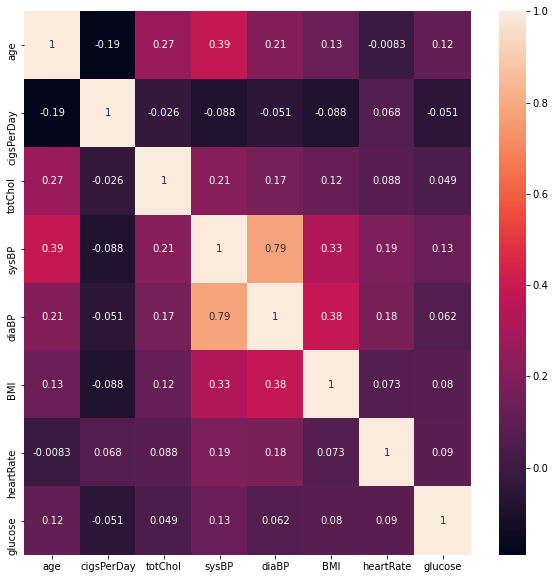

In [42]:
plt.figure(figsize=(10,10))
num = df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
                                                                                
sns.heatmap(num.corr(),annot=True)
plt.show()

In [43]:
num = num.drop(columns='diaBP')

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
x = num
y = df['CVD']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression(max_iter=1000)

rfe = RFE(lr,n_features_to_select=5)

rfe.fit(xtrain,ytrain)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [45]:
d = pd.DataFrame(rfe.ranking_, index=xtrain.columns,columns=['Rank']).sort_values(by='Rank')

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
xtrain_12 = xtrain[d[d['Rank']==1].index]
xtest_12  = xtest[d[d['Rank']==1].index]

In [47]:
lr_12 = LogisticRegression(max_iter=10000)
lr_12.fit(xtrain_12,ytrain)

LogisticRegression(max_iter=10000)

In [48]:
ypred_12 = lr_12.predict(xtest_12)

In [49]:
confusion_matrix(ytest,ypred_12)

array([[1013,   14],
       [ 160,   10]], dtype=int64)

In [50]:
f1_score(ytest,ypred_12)

0.10309278350515463

In [51]:
accuracy_score(ytest,ypred_12)

0.8546365914786967

In [52]:
roc_auc_score(ytest,ypred_12)

0.522595795864597

In [53]:
fpr_12,tpr_12,thresholds_12 = roc_curve(ytest,ypred_12)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

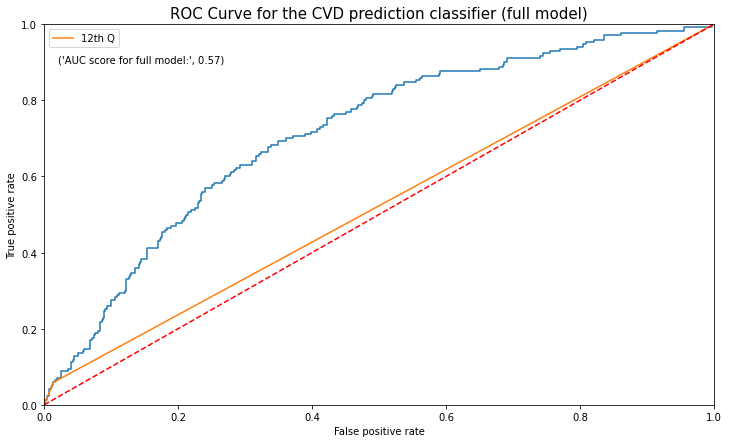

In [54]:
fpr,tpr,thresholds = roc_curve(ytest_full,ypred_prob_full)
plt.figure(figsize=(12,7))
plt.plot(fpr,tpr)
plt.plot(fpr_12,tpr_12,label='12th Q')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve for the CVD prediction classifier (full model)',fontsize=15)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.text(x=0.02,y=0.9,s = ('AUC score for full model:',round(roc_auc_score(ytest_full,ypred_full),2)))
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
x=df[['heartRate']]
y=df['CVD']
xc= sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3,random_state=0)

log_heart = sm.Logit(ytrain,xtrain).fit()

ypred_prob = log_heart.predict(xtest)
print('AUC Score:',roc_auc_score(ytest,ypred_prob))

Optimization terminated successfully.
         Current function value: 0.425781
         Iterations 6
AUC Score: 0.48040838535998626


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
ypred = [0 if x<0.5 else 1 for x in ypred_prob]

print('Log loss:',log_loss(ytest,ypred))

Log loss: 4.905256463771777


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
roc_auc_score(ytest_full,ypred_full)

0.5689730225098802

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
print('Log loss:',log_loss(ytest_full,ypred_full))

Log loss: 24.382569186924474


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
x = df['cigsPerDay']
y = df['CVD']
xc =sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3,random_state=0)

log_reg_cigs = sm.Logit(ytrain,xtrain).fit()

ypred_prob = log_reg_cigs.predict(xtest)
ypred = [0 if x< 0.5 else 1 for x in ypred_prob]

print(classification_report(ytest,ypred))

Optimization terminated successfully.
         Current function value: 0.425094
         Iterations 6
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1027
           1       0.00      0.00      0.00       170

    accuracy                           0.86      1197
   macro avg       0.43      0.50      0.46      1197
weighted avg       0.74      0.86      0.79      1197



<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2792
Model:                          Logit   Df Residuals:                     2774
Method:                           MLE   Df Model:                           17
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                  0.1277
Time:                        17:08:36   Log-Likelihood:                -1038.8
converged:                       True   LL-Null:                       -1190.9
Covariance Type:            nonrobust   LLR p-value:                 1.535e-54
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2310      0.155    -14.368      0.000      -2.535      -1.927
age                 0.5739      0.067      8.555      0.000       0.442       0.705
cigsPerDay          0.2252      0.087      2.580      0.010       0.054       0.396
totChol             0.0977      0.057      1.704      0.088      -0.015       0.210
sysBP               0.2672      0.096      2.790      0.005       0.079       0.455
diaBP              -0.0233      0.089     -0.260      0.795      -0.198       0.152
BMI                 0.0423      0.059      0.713      0.476      -0.074       0.159
heartRate           0.0080      0.058      0.137      0.891      -0.106       0.122
glucose             0.1840      0.067      2.748      0.006       0.053       0.315
male                0.5031      0.127      3.973      0.000       0.255       0.751
currentSmoker       0.0906      0.181      0.500      0.617      -0.264       0.446
BPMeds              0.3016      0.270      1.118      0.264      -0.227       0.830
prevalentHyp        0.1865      0.161      1.158      0.247      -0.129       0.502
prevalentStroke     1.0626      0.629      1.690      0.091      -0.170       2.295
diabetes            0.4057      0.377      1.077      0.282      -0.333       1.144
education_2.0      -0.2086      0.143     -1.459      0.144      -0.489       0.072
education_3.0      -0.1800      0.174     -1.036      0.300      -0.521       0.160
education_4.0      -0.1563      0.194     -0.805      0.421      -0.537       0.224
===================================================================================
"""

In [61]:
from sklearn.metrics import roc_auc_score,roc_curve

fpr,tpr,thresholds = roc_curve(ytest_full,ypred_prob_full)

youdens_table = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thresholds})
youdens_table['Difference'] = youdens_table['TPR'] - youdens_table['FPR']
youdens_table = youdens_table.sort_values(by ='Difference',ascending=False).reset_index(drop=True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.694118,0.349562,0.150532,0.344556
1,0.682353,0.338851,0.152719,0.343502
2,0.676471,0.333982,0.153965,0.342488
3,0.664706,0.324245,0.156160,0.340461
4,0.700000,0.361246,0.147074,0.338754


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
def cal_tot_cost(actual_value,predicted_value,cost_fn,cost_fp):
    cm = confusion_matrix(actual_value,predicted_value)
    cm_array = np.array(cm)
    return cm_array[1,0]*cost_fn + cm_array[0,1]*cost_fp

df_total_cost = pd.DataFrame(columns = ['cut-off','total_cost'])
i=0

for cut_off in range(10,50):
    total_cost = cal_tot_cost(ytest_full,ypred_prob_full.map(lambda x : 1 if x> (cut_off/100) else 0))
    df_total_cost.iloc[i] = [(cut_off/100),total_cost]
    i=i+1

df_total_cost.sort_values('total_cost',ascending=True).head()